# Deteksi Jarak

## Import Pustaka

In [23]:
import cv2 
import matplotlib.pyplot as plt

## Inisialisasi Warna, Jarak, Fonts

In [24]:
# Jarak yang diketahui dalam centimeter
Known_distance = 76.2

# Lebar objek yang diketahui dalam centimeter
Known_width = 14.3

# Colors
GREEN = (0, 255, 0) 
RED = (0, 0, 255) 
WHITE = (255, 255, 255) 
BLACK = (0, 0, 0) 

# Defining the fonts
fonts = cv2.FONT_HERSHEY_COMPLEX 

# Face detector object
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 

## Membuat fungsi mengembalikan panjang fokus

In [25]:
# Focal length finder function
# Fungsi ini akan mengembalikan panjang fokus
def Focal_Length_Finder(measured_distance, real_width, width_in_rf_image): 
    # Finding the focal length 
    focal_length = (width_in_rf_image * measured_distance) / real_width 
    return focal_length 

## Membuat fungsi mengembalikan jarak

In [26]:
# Distance estimation function
# Fungsi ini akan mengembalikan jarak
def Distance_finder(Focal_Length, real_face_width, face_width_in_frame): 
    distance = (real_face_width * Focal_Length) / face_width_in_frame 
    # Return the distance 
    return distance 

## membuat fungsi mengembalikan lebar wajah

In [54]:
# Fungsi ini akan mengembalikan lebar wajah
def face_data(image): 
    face_width = 0 # Making face width to zero 
    # Converting color image to gray scale image 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    # Detecting face in the image 
    faces = face_detector.detectMultiScale(gray_image, 1.3, 5) 
    # Looping through the faces detected in the image 
    for (x, y, w, h) in faces: 
        # Draw the rectangle on the face 
        cv2.rectangle(image, (x, y), (x+w, y+h), GREEN, 2) 
        # Getting face width in the pixels 
        face_width = w
        # Drawing text above the rectangle
        cv2.putText(image, f"Distance: {round(Distance / 3.4, 2)} CM", (x, y - 10), fonts, 0.6, GREEN, 2)
    # Return the face width in pixel 
    return face_width 

## Mendeteksi jarak wajah dari kamera

Focal Length: 562.6450020567668


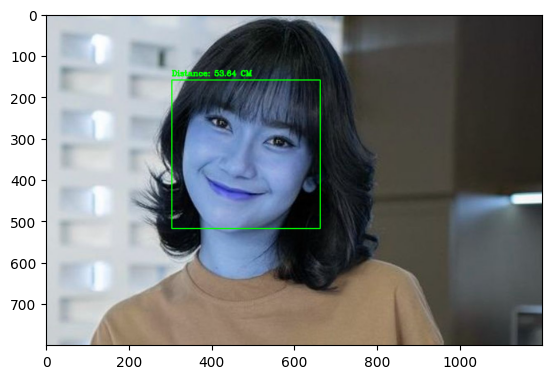

In [55]:
# Reading reference_image from directory 
# Mendetect jarak wajah dari kamera
ref_image = cv2.imread("./tests/freya.jpg") 

# Find the face width (pixels) in the reference_image 
ref_image_face_width = face_data(ref_image) 

# Get the focal by calling "Focal_Length_Finder" 
Focal_length_found = Focal_Length_Finder(
    Known_distance, Known_width, ref_image_face_width
) 

# 3.4 untuk mengira-ngira jarak dalam centimeter
print(f"Focal Length: {Focal_length_found / 3.4}") 

# Show the reference image 
# Show image with matplotlib
plt.imshow(ref_image)
plt.show() 

## Mendeteksi jarak wajah dari kamera secara realtime

In [29]:
# Initialize the camera object so that we can get frame from it 
cap = cv2.VideoCapture(1) 

# Looping through frame, incoming from camera/video 
while True: 
    # Reading the frame from camera 
    ret, frame = cap.read() 
    if not ret:
        break

    # Calling face_data function to find the width of face (pixels) in the frame 
    face_width_in_frame = face_data(frame) 

    # Check if the face width is not zero then find the distance 
    if face_width_in_frame != 0: 
        # Finding the distance by calling the function 
        Distance = Distance_finder(
            Focal_length_found, Known_width, face_width_in_frame
        ) 

        # Draw line as background of text 
        cv2.line(frame, (30, 30), (230, 30), RED, 32) 
        cv2.line(frame, (30, 30), (230, 30), BLACK, 28) 

        # Drawing text on the screen 
        cv2.putText(
            frame, f"Distance: {round(Distance / 3.4, 2)} CM", (30, 35), 
            fonts, 0.6, GREEN, 2
        ) 

    # Show the frame on the screen 
    cv2.imshow("frame", frame) 

    # Quit the program if you press 'q' on keyboard 
    if cv2.waitKey(1) == ord("q"): 
        break

# Closing the camera 
cap.release() 

# Closing the windows that are opened 
cv2.destroyAllWindows() 


## Mendeteksi jarak wajah dari kamera secara realtime (multiple people)

In [56]:
# Initialize the camera object so that we can get frame from it 
cap = cv2.VideoCapture(1) 

# Looping through frame, incoming from camera/video 
while True: 
    # Reading the frame from camera 
    ret, frame = cap.read() 
    if not ret:
        break

    # Calling face_data function to find the width of face (pixels) in the frame 
    face_width_in_frame = face_data(frame) 

    # Check if the face width is not zero then find the distance 
    if face_width_in_frame != 0: 
        # Finding the distance by calling the function 
        Distance = Distance_finder(
            Focal_length_found, Known_width, face_width_in_frame
        ) 

    # Show the frame on the screen 
    cv2.imshow("frame", frame) 

    # Quit the program if you press 'q' on keyboard 
    if cv2.waitKey(1) == ord("q"): 
        break

# Closing the camera 
cap.release() 

# Closing the windows that are opened 
cv2.destroyAllWindows()
